### Downloading the MNIST Data

In [1]:
from tensorflow.keras.datasets import mnist

### Splitting the data into training and testing data

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Printing the shape of the data

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


### Checking the datatype of the testing input 

In [4]:
x_test.dtype

dtype('uint8')

### Importing the package for showing the input image

In [5]:
import matplotlib.pyplot as plt


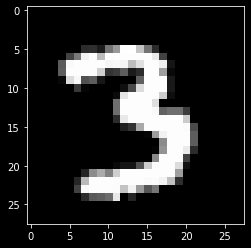

In [6]:
plt.imshow(x_test[500]/255, cmap=plt.cm.gray) # plotting an example image

### Creating a two layer neural network using keras

## TwoLayerNet in Keras

In [7]:
from tensorflow import keras # import keras from tensorflow


In [8]:
model = keras.Sequential([ # create a sequential model
    keras.layers.Dense(100, activation="sigmoid", input_shape=(784, )), # add a dense layer with 100 neurons and sigmoid activation
    keras.layers.Dense(10, activation="softmax") # add a dense layer with 10 neurons and softmax activation
])

In [9]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"]) # compile the model with the SGD optimizer, categorical crossentropy loss and accuracy as a metric

In [10]:


from tensorflow.keras.datasets import mnist # import the mnist dataset

In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # load the mnist dataset

In [12]:
x_train[0].shape # check the shape of the first image

(28, 28)

In [13]:
x_test.shape # check the shape of the test set

(10000, 28, 28)

In [14]:
keras.utils.to_categorical(y_train, num_classes=10) # one-hot encode the labels 

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

### Preprocess datasets

In [15]:
# Reshape 28x28 to 784
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [16]:
x_train.shape # check the shape of the training set

(60000, 784)

In [17]:
# Normalize values to 0 .. 1
x_train = x_train/255.0
x_test = x_test/255.0

In [18]:
y_train = keras.utils.to_categorical(y_train, num_classes=10) # one-hot encode the training labels
y_test =  keras.utils.to_categorical(y_test, num_classes=10) # one-hot encode the test labels

In [19]:
y_train[0] # check the one-hot encoded label of the first image

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
model.fit(x_train, y_train, epochs=20, batch_size=32) # train the model for 20 epochs with a batch size of 32

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4683 - accuracy: 0.7056
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7155 - accuracy: 0.8474
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5321 - accuracy: 0.8714
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4545 - accuracy: 0.8834
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4113 - accuracy: 0.8906
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3834 - accuracy: 0.8952
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3634 - accuracy: 0.8995
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3481 - accuracy: 0.9023
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3357 - accuracy: 0.9054
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: 0.325

In [21]:
predictions = model.predict(x_test[0:10]) # predict the first 10 images of the test set

1/1 [==============================] - 0s 94ms/step


In [22]:
import numpy as np # import numpy

In [23]:
predictions = np.argmax(predictions, axis=1) # get the index of the highest value in the predictions

In [24]:
predictions # checking the predictions

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [25]:
labels = np.argmax(y_test[0:10], axis=1) # get the index of the highest value in the labels

In [26]:
labels # checking the labels

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [27]:
predictions == labels # check if the predictions are equal to the  original labels

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True])

### Creating a Convolutional Neural Network using Keras

### LeNet in Keras

In [28]:
from tensorflow.keras.models import Sequential # import the sequential model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense # import the layers
from tensorflow.keras.datasets import mnist # import the mnist dataset
from tensorflow.keras.utils import to_categorical # import the to_categorical function
import numpy as np

In [29]:
class LeNet:
    """
    Implementation of the LeNet architecture for digit classification on the MNIST dataset.
    """
    def __init__(self, batch_size=32, epochs=20):
        """
        Initialize the LeNet instance with default parameters.
        """
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        self._create_lenet()
        self._compile()


    def _create_lenet(self):
        """Create the LeNet model architecture."""
        self.model = Sequential([
            Conv2D(filters=6, kernel_size=(5,5),
                   activation='sigmoid', input_shape=(28, 28, 1),
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),

            Conv2D(filters=16, kernel_size=(5,5),
                   activation='sigmoid',
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),

            Flatten(),

            Dense(120, activation='sigmoid'),
            Dense(84, activation='sigmoid'),
            Dense(10, activation='softmax')
        ])

    def _compile(self):
        """
        Compile the model with the Adam optimizer, categorical cross-entropy loss,
        and accuracy as a metric.
        """
        if self.model is None:
            print('Error: Create a model first..')

        self.model.compile(optimizer='Adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])


    def _preprocess(self):
        """
        Load and preprocess the MNIST dataset. 
        - Normalize pixel values to the range [0, 1].
        - Reshape input images to include the channel dimension.
        - Convert labels to one-hot encoded format.
        """
        # load mnist data
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        # normalize
        x_train = x_train/255.0
        x_test = x_test/255.0

        # add channel dim
        self.x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
        self.x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

        # one-hot encoding
        self.y_train = to_categorical(y_train, 10)
        self.y_test = to_categorical(y_test, 10)

    def train(self):
        """
        Train the model on the preprocessed MNIST training data.
        """
        self._preprocess()
        self.model.fit(self.x_train, self.y_train,
                  batch_size=self.batch_size,
                  epochs=self.epochs)

In [30]:
lenet = LeNet(batch_size=64, epochs=10)

In [31]:
lenet.train()

Epoch 1/10
938/938 [==============================] - 15s 15ms/step - loss: 1.0736 - accuracy: 0.6443
Epoch 2/10
938/938 [==============================] - 15s 16ms/step - loss: 0.2609 - accuracy: 0.9213
Epoch 3/10
938/938 [==============================] - 15s 16ms/step - loss: 0.1708 - accuracy: 0.9479
Epoch 4/10
938/938 [==============================] - 16s 17ms/step - loss: 0.1294 - accuracy: 0.9603
Epoch 5/10
938/938 [==============================] - 15s 16ms/step - loss: 0.1039 - accuracy: 0.9682
Epoch 6/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0860 - accuracy: 0.9732
Epoch 7/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0734 - accuracy: 0.9779
Epoch 8/10
938/938 [==============================] - 17s 18ms/step - loss: 0.0637 - accuracy: 0.9803
Epoch 9/10
938/938 [==============================] - 15s 16ms/step - loss: 0.0561 - accuracy: 0.9828
Epoch 10/10
938/938 [==============================] - 14s 15ms/step - loss: 0.050

In [32]:
import numpy as np

# Ensure x_test is correctly reshaped
lenet._preprocess()  # This will ensure `lenet.x_test` is properly prepared

# Predict the first 10 samples from the reshaped `x_test`
predictions = np.argmax(lenet.model.predict(lenet.x_test[:10]), axis=1)
print("Predictions:", predictions)


1/1 [==============================] - 0s 72ms/step
Predictions: [7 2 1 0 4 1 4 9 5 9]


In [33]:
print(predictions)

[7 2 1 0 4 1 4 9 5 9]


In [34]:
labels = np.argmax(lenet.y_test[0:10], axis=1)

In [35]:
print(labels)

[7 2 1 0 4 1 4 9 5 9]


In [36]:
print(predictions == labels)

[ True  True  True  True  True  True  True  True  True  True]


In [43]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt



In [44]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

class LeNet:
    """
    Implementation of the LeNet architecture for digit classification on the MNIST dataset.
    """
    def __init__(self, batch_size=32, epochs=20):
        """
        Initialize the LeNet instance with default parameters.
        """
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        self._create_lenet()  # Build the LeNet model
        self._compile()       # Compile the model

    def _create_lenet(self):
        """Create the LeNet model architecture."""
        self.model = Sequential([
            # First convolutional layer with 6 filters, kernel size of 5x5, and sigmoid activation.
            Conv2D(filters=6, kernel_size=(5, 5), activation='sigmoid',
                   input_shape=(28, 28, 1), padding='same'),
            # First pooling layer with a 2x2 pool size and stride of 2.
            AveragePooling2D(pool_size=(2, 2), strides=2),

            # Second convolutional layer with 16 filters, kernel size of 5x5, and sigmoid activation.
            Conv2D(filters=16, kernel_size=(5, 5), activation='sigmoid', padding='same'),
            # Second pooling layer with a 2x2 pool size and stride of 2.
            AveragePooling2D(pool_size=(2, 2), strides=2),

            # Flatten the output from the convolutional layers.
            Flatten(),

            # Fully connected layer with 120 units and sigmoid activation.
            Dense(120, activation='sigmoid'),
            # Fully connected layer with 84 units and sigmoid activation.
            Dense(84, activation='sigmoid'),
            # Output layer with 10 units (one for each digit) and softmax activation.
            Dense(10, activation='softmax')
        ])

    def _compile(self):
        """
        Compile the model with the Adam optimizer, categorical cross-entropy loss,
        and accuracy as a metric.
        """
        if self.model is None:
            raise ValueError('Error: Create a model first.')

        self.model.compile(optimizer='Adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    def _preprocess(self):
        """
        Load and preprocess the MNIST dataset. 
        - Normalize pixel values to the range [0, 1].
        - Reshape input images to include the channel dimension.
        - Convert labels to one-hot encoded format.
        """
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        # Normalize the images
        x_train = x_train.astype('float32') / 255.0
        x_test = x_test.astype('float32') / 255.0

        # Reshape to include the channel dimension
        self.x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
        self.x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

        # One-hot encode the labels
        self.y_train = to_categorical(y_train, 10)
        self.y_test = to_categorical(y_test, 10)

    def train(self):
        """
        Train the model on the preprocessed MNIST training data.
        """
        self._preprocess()
        self.model.fit(self.x_train, self.y_train,
                       batch_size=self.batch_size,
                       epochs=self.epochs,
                       validation_split=0.1)

    def evaluate(self):
        """
        Evaluate the model's performance on the test dataset.
        Prints Test loss and accuracy.
        """
        loss, accuracy = self.model.evaluate(self.x_test, self.y_test)
        print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

    def save(self, model_path_name):
        """
        Save the trained model to a file.

        """
        self.model.save(f"{model_path_name}.keras")
        print(f"Model saved as {model_path_name}.keras")

    def load(self, model_path_name):
        """
        Load a previously saved model from a file.

        """
        self.model = load_model(f"{model_path_name}.keras")
        print(f"Model loaded from {model_path_name}.keras")

    def predict(self, images):
        """
        Predict the class labels for the given images.

        Takes Input images to classify. Should have shape  (n_samples, 28, 28) or (28, 28) for a single image.

        Returns Predicted class labels for each input image.
        """
        if len(images.shape) == 3:  # Single image case
            images = np.expand_dims(images, axis=0)

        if images.shape[-1] != 1:  # Ensure channel dimension exists
            images = images.reshape(images.shape[0], 28, 28, 1)

        predictions = self.model.predict(images)
        return np.argmax(predictions, axis=1)


In [45]:
# Create an instance of LeNet
lenet = LeNet(batch_size=64, epochs=10)

# Train the model
lenet.train()

# Save the trained model
lenet.save("kolluru")


Epoch 1/10
844/844 [==============================] - 15s 17ms/step - loss: 1.2216 - accuracy: 0.5866 - val_loss: 0.2926 - val_accuracy: 0.9212
Epoch 2/10
844/844 [==============================] - 13s 16ms/step - loss: 0.2623 - accuracy: 0.9221 - val_loss: 0.1564 - val_accuracy: 0.9545
Epoch 3/10
844/844 [==============================] - 14s 16ms/step - loss: 0.1727 - accuracy: 0.9478 - val_loss: 0.1152 - val_accuracy: 0.9652
Epoch 4/10
844/844 [==============================] - 13s 16ms/step - loss: 0.1295 - accuracy: 0.9592 - val_loss: 0.0939 - val_accuracy: 0.9723
Epoch 5/10
844/844 [==============================] - 13s 15ms/step - loss: 0.1048 - accuracy: 0.9679 - val_loss: 0.0786 - val_accuracy: 0.9772
Epoch 6/10
844/844 [==============================] - 13s 15ms/step - loss: 0.0863 - accuracy: 0.9729 - val_loss: 0.0787 - val_accuracy: 0.9775
Epoch 7/10
844/844 [==============================] - 13s 15ms/step - loss: 0.0756 - accuracy: 0.9769 - val_loss: 0.0681 - val_accuracy:

In [46]:
# Load the saved model
lenet.load("kolluru")

# Evaluate the loaded model
lenet.evaluate()


Model loaded from kolluru.keras
313/313 [==============================] - 1s 4ms/step - loss: 0.0526 - accuracy: 0.9836
Test Loss: 0.0526, Test Accuracy: 0.9836


2/2 [==============================] - 0s 5ms/step


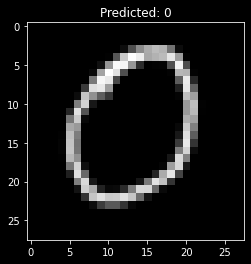

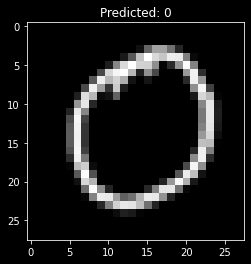

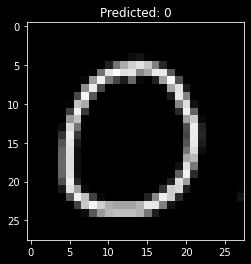

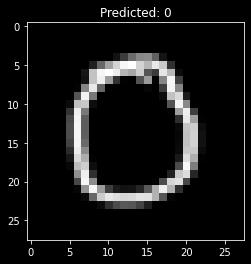

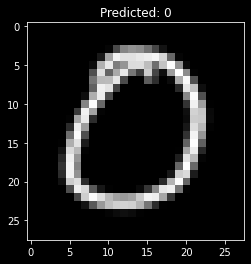

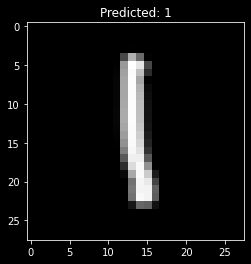

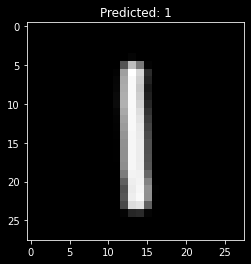

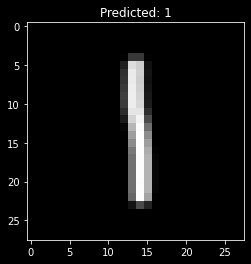

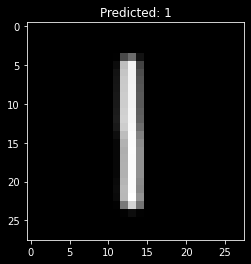

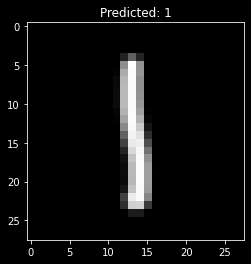

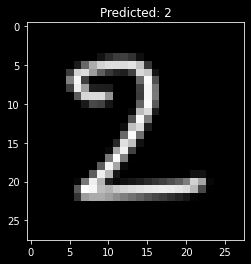

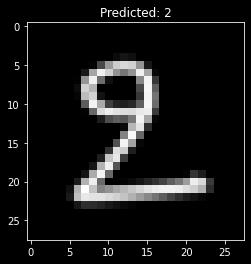

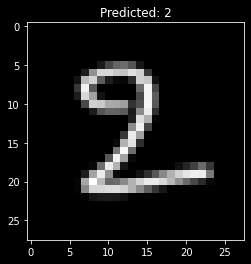

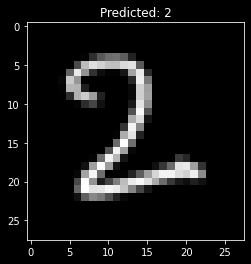

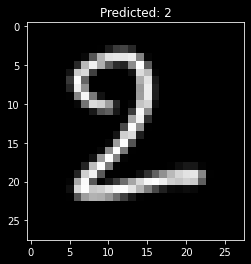

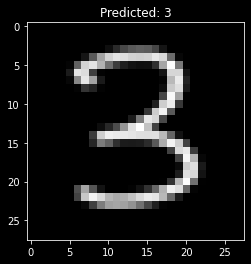

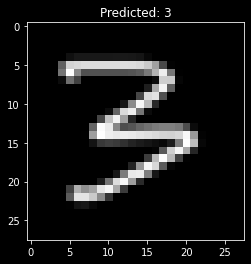

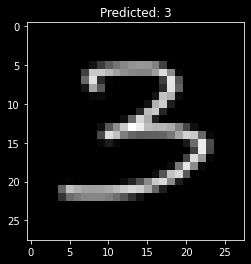

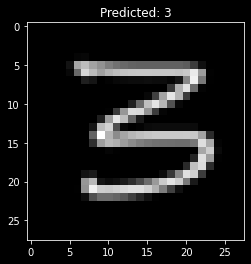

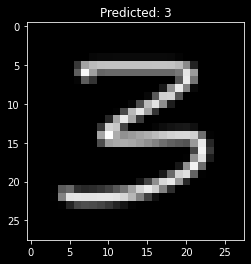

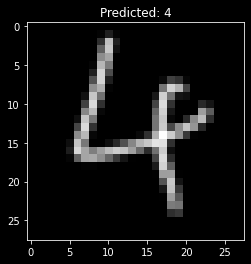

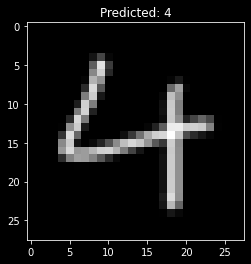

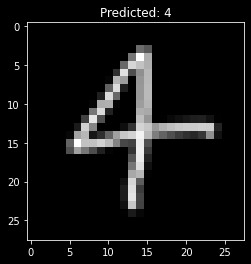

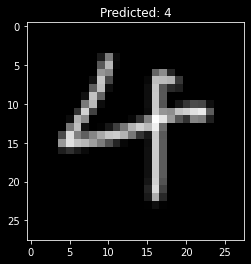

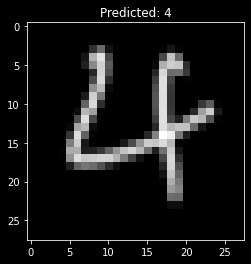

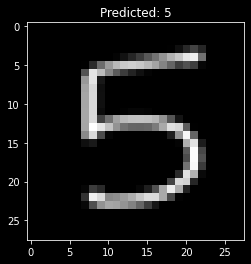

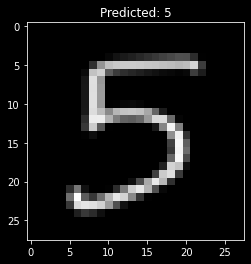

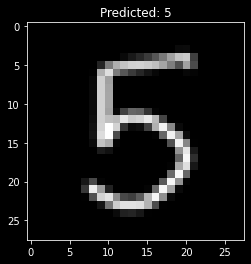

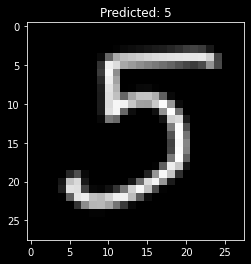

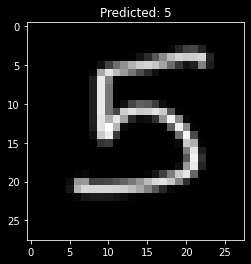

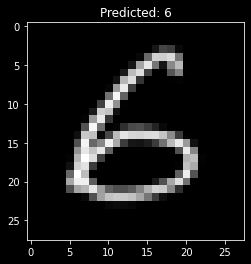

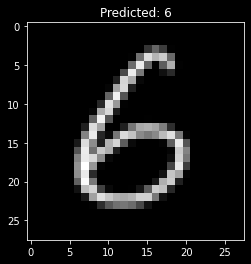

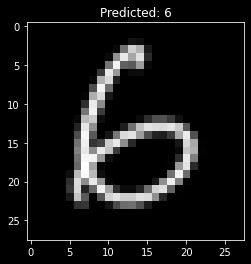

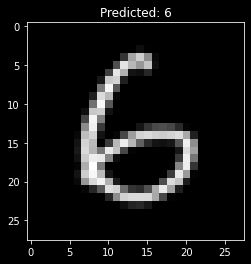

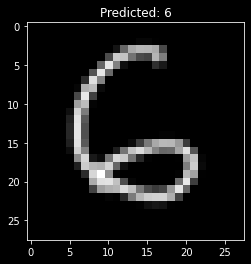

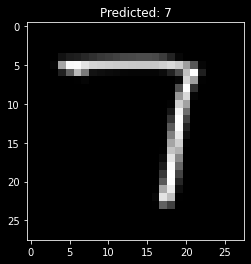

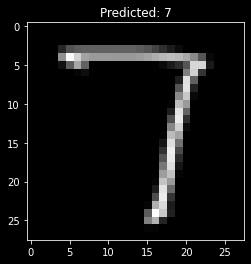

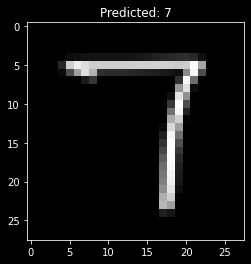

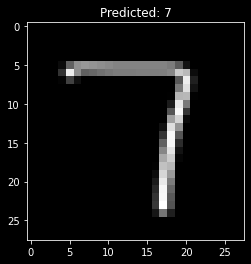

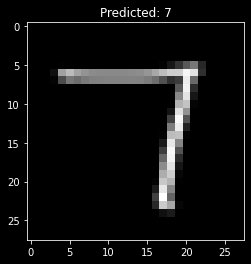

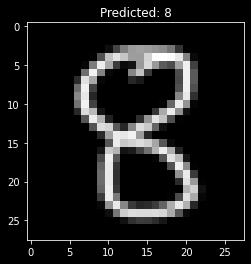

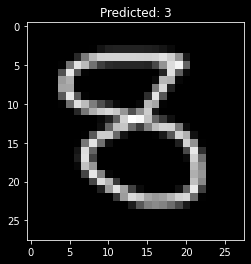

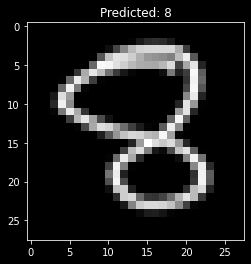

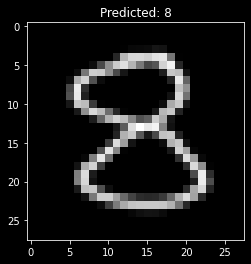

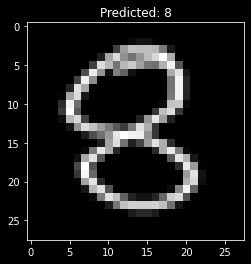

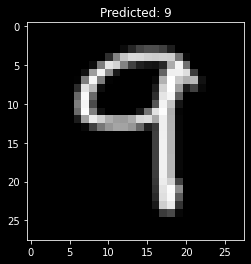

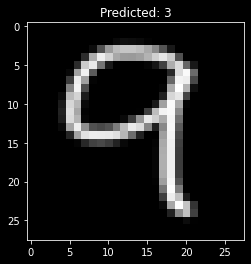

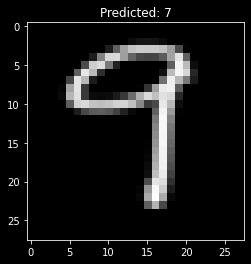

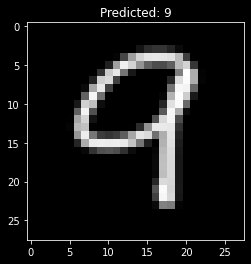

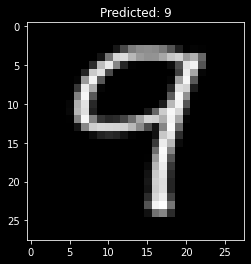

In [47]:
# Load handwritten digit images from HW5-3
# Assume images are in 'handwritten_images/' directory as grayscale (28x28).

import os
from PIL import Image

# Preprocess images for prediction
def load_images(image_dir):
    images = []
    for img_file in os.listdir(image_dir):
        img = Image.open(os.path.join(image_dir, img_file)).convert('L')  # Convert to grayscale
        img = img.resize((28, 28))  # Ensure size
        img = np.array(img) / 255.0  # Normalize
        images.append(img)
    return np.array(images)

# Load and predict
handwritten_images = load_images('images')
predictions = np.argmax(lenet.model.predict(handwritten_images),axis = 1)

# Display results
for i, pred in enumerate(predictions):
    plt.imshow(handwritten_images[i], cmap='gray')
    plt.title(f"Predicted: {pred}")
    plt.show()


In [48]:
import os
image_dir = './'
for digit in range (10):
    for index in range(5):
        filename = f"{digit}_{index}.png"
        filepath = os.path.join(image_dir, filename)
        if os.path.exists(filepath):
            print(f"Testing {filename}...")
            !python module8.py {filename} {digit}

        else:
            print(f"File {filename} not found.")

Testing 0_0.png...
Model loaded from kolluru.keras

1/1 [==============================] - 0s 134ms/step
Figure(640x480)
Success: Image '0_0.png' is for digit 0 and recognized as 0.
Testing 0_1.png...
Model loaded from kolluru.keras

1/1 [==============================] - 0s 116ms/step
Figure(640x480)
Success: Image '0_1.png' is for digit 0 and recognized as 0.
Testing 0_2.png...
Model loaded from kolluru.keras

1/1 [==============================] - 0s 153ms/step
Figure(640x480)
Success: Image '0_2.png' is for digit 0 and recognized as 0.
Testing 0_3.png...
Model loaded from kolluru.keras

1/1 [==============================] - 0s 131ms/step
Figure(640x480)
Success: Image '0_3.png' is for digit 0 and recognized as 0.
Testing 0_4.png...
Model loaded from kolluru.keras

1/1 [==============================] - 0s 135ms/step
Figure(640x480)
Success: Image '0_4.png' is for digit 0 and recognized as 0.
Testing 1_0.png...
Model loaded from kolluru.keras

1/1 [==============================] -